# Bike Rental Count Analysis AND Prediction

## Business Case

 <div style='text-align: justify;'> Bike sharing system are new version of traditional bike rental where the wholeprocess from membership,rental and return back has been automated.through systems,user are easily able to rent a bike from a particular position and return back at another position.currently there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today there exists greatinterest in these system due to their important role in traffic,enviornmental and health issues.Apart from interesting real world applications of bike sharing systems,the characteristics of data being generated by these systems make them attractive for research.Opposed to other transport services such as bus or subway,the duration of travel,departure and arrival position is explicitly recorded in these systems.This feature turns the bike sharing system into a virtual sensor networkthat can be used for sensing mobility in the city.Hence,it is expected that most of the important events in the city could be detected via monitoring this data.
</div>


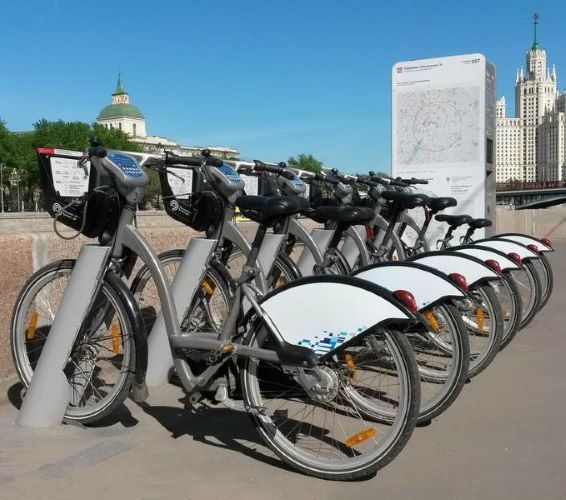

Aim to prepare data analysis report on the given data and prediction of daily bike rental count based on the given enviornment and seasonal setting.

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Given Data

In [2]:
Bike_dh=pd.read_csv("hour.csv")
print(Bike_dh.head())
print(Bike_dh.shape)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
(17379, 17)


In [3]:
Bike_dd=pd.read_csv("day.csv")
print(Bike_dd.head())
print(Bike_dd.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)


## Domain Analysis

 We have given two data files,one is hour.csv file and the other one day.csv.By analysing input variables,the only difference is hour field is more in hour.csv file.Also the number of rows is more for hour.csv.Hence we using hour.csv file.
 
* hour.csv file loaded to Bike_dh(Bike data hour)
* instant:recorded index
* dteday:date
* season:season(1-winter,2-spring,3-summer,4-fall)
* yr:yaer(0-2011,1-2012)
* mnth:month(1-12)
* hr:hour(0-23)
* holiday:weather day is holiday or not
* weekday:day of the week
* workingday:neither weekend nor holiday,it is 1,other 0
* waethersit:1-clear to partly cloud
             2-mist cloud to mist
             3-snow,light rain
             4-heavy rain or snow fog
* temp:Normalised temperature
* atemp:Normalised feeling temperature
* hum:humidity(divided into 100)
* windspeed:Normalised wind speed
* casual:count of casual user
* registered:count of registered user
* cnt:count of total rental bikes including both registerd and casual

## Basic checks

In [4]:
Bike_dh.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
Bike_dh.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
Bike_dh.shape

(17379, 17)

In [7]:
Bike_dh.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
Bike_dh.rename(columns={'yr':'year','mnth':'month','hr':'hour','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [9]:
Bike_dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [10]:
#Type casting
Bike_dh['season']=Bike_dh.season.astype('category')
Bike_dh['year']=Bike_dh.year.astype('category')
Bike_dh['month']=Bike_dh.month.astype('category')
Bike_dh['hour']=Bike_dh.hour.astype('category')
Bike_dh['holiday']=Bike_dh.holiday.astype('category')
Bike_dh['weekday']=Bike_dh.weekday.astype('category')
Bike_dh['workingday']=Bike_dh.workingday.astype('category')
Bike_dh['weather_condition']=Bike_dh.weather_condition.astype('category')
Bike_dh['total_count']=Bike_dh.total_count.astype('float32')
#Bike_dh['registered']=Bike_dh.registered.astype('float32')


In [11]:
Bike_dh.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
humidity,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
total_count,17379.0,189.463089,181.387390,1.00,40.0000,142.0000,281.0000,977.0000


In [12]:
Bike_dh.nunique()

instant              17379
dteday                 731
season                   4
year                     2
month                   12
hour                    24
holiday                  2
weekday                  7
workingday               2
weather_condition        4
temp                    50
atemp                   65
humidity                89
windspeed               30
casual                 322
registered             776
total_count            869
dtype: int64

In [13]:
Bike_dh['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [14]:
Bike_dh['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

## Data preprocessing

In [15]:
# droping unwanted columns like instant(id not required) dteday(date represent year-month-day,there is a seprate field for year,month,day)
Bike_dh.drop(columns=['instant','dteday'],inplace=True,axis=1)

In [16]:
Bike_dh.isnull().sum()

season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [17]:
Bike_dh.duplicated().sum()

2

In [18]:
Bike_dh.drop_duplicates(inplace=True)

## Exploratory Data Analysis

In [19]:
Bike_dh.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count'],
      dtype='object')

In [20]:
num_col=Bike_dh.loc[:,['temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count']]
cat_col=Bike_dh.loc[:,['season','month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather_condition']]

#### Univariate

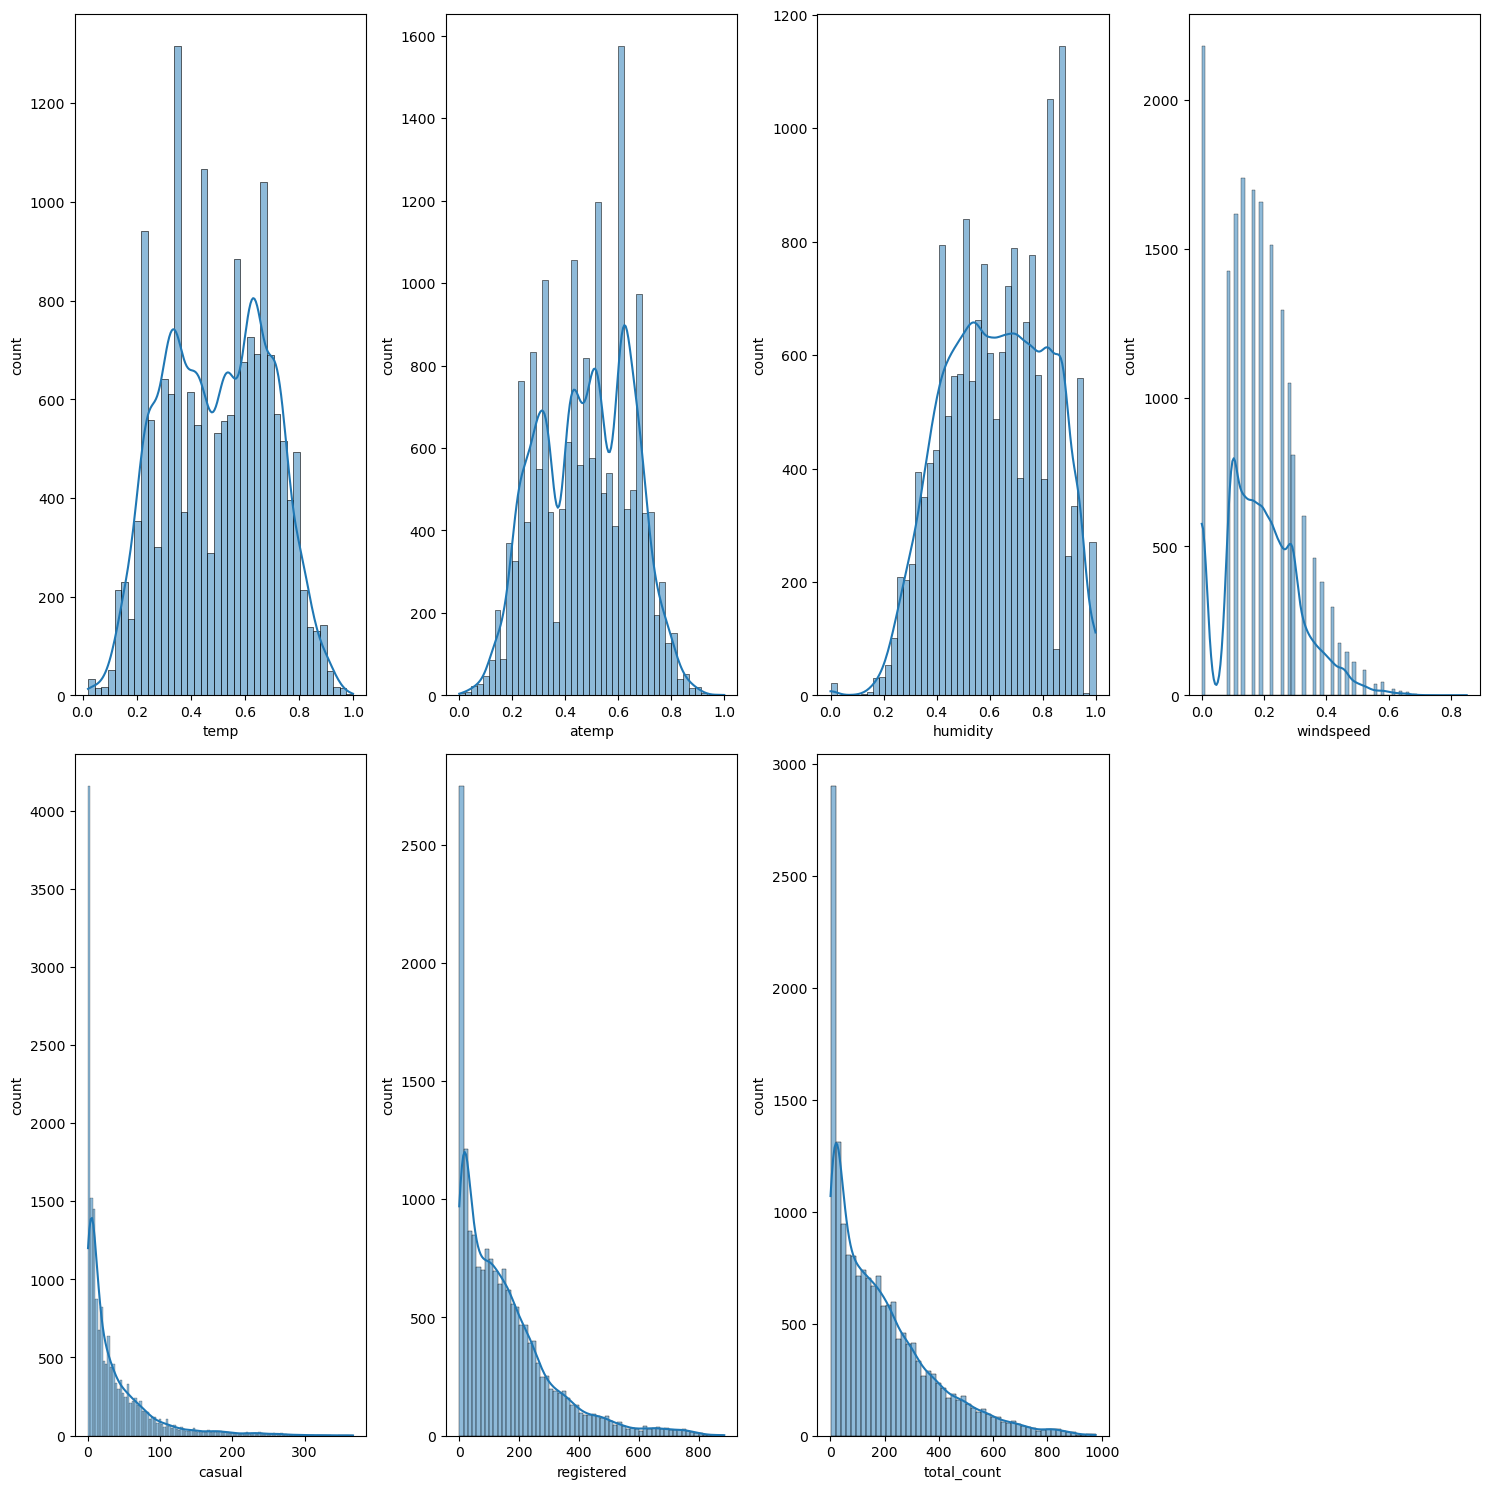

In [21]:
# check for destribution of data
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.histplot(x=num_col[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()


###### Insight

* The destribution of count(target variable ),casual,registered are right skewed
* The destribution of temp,humidity almost normal
* The destribution of atemp and windspeed is not normal

#### Bivariate

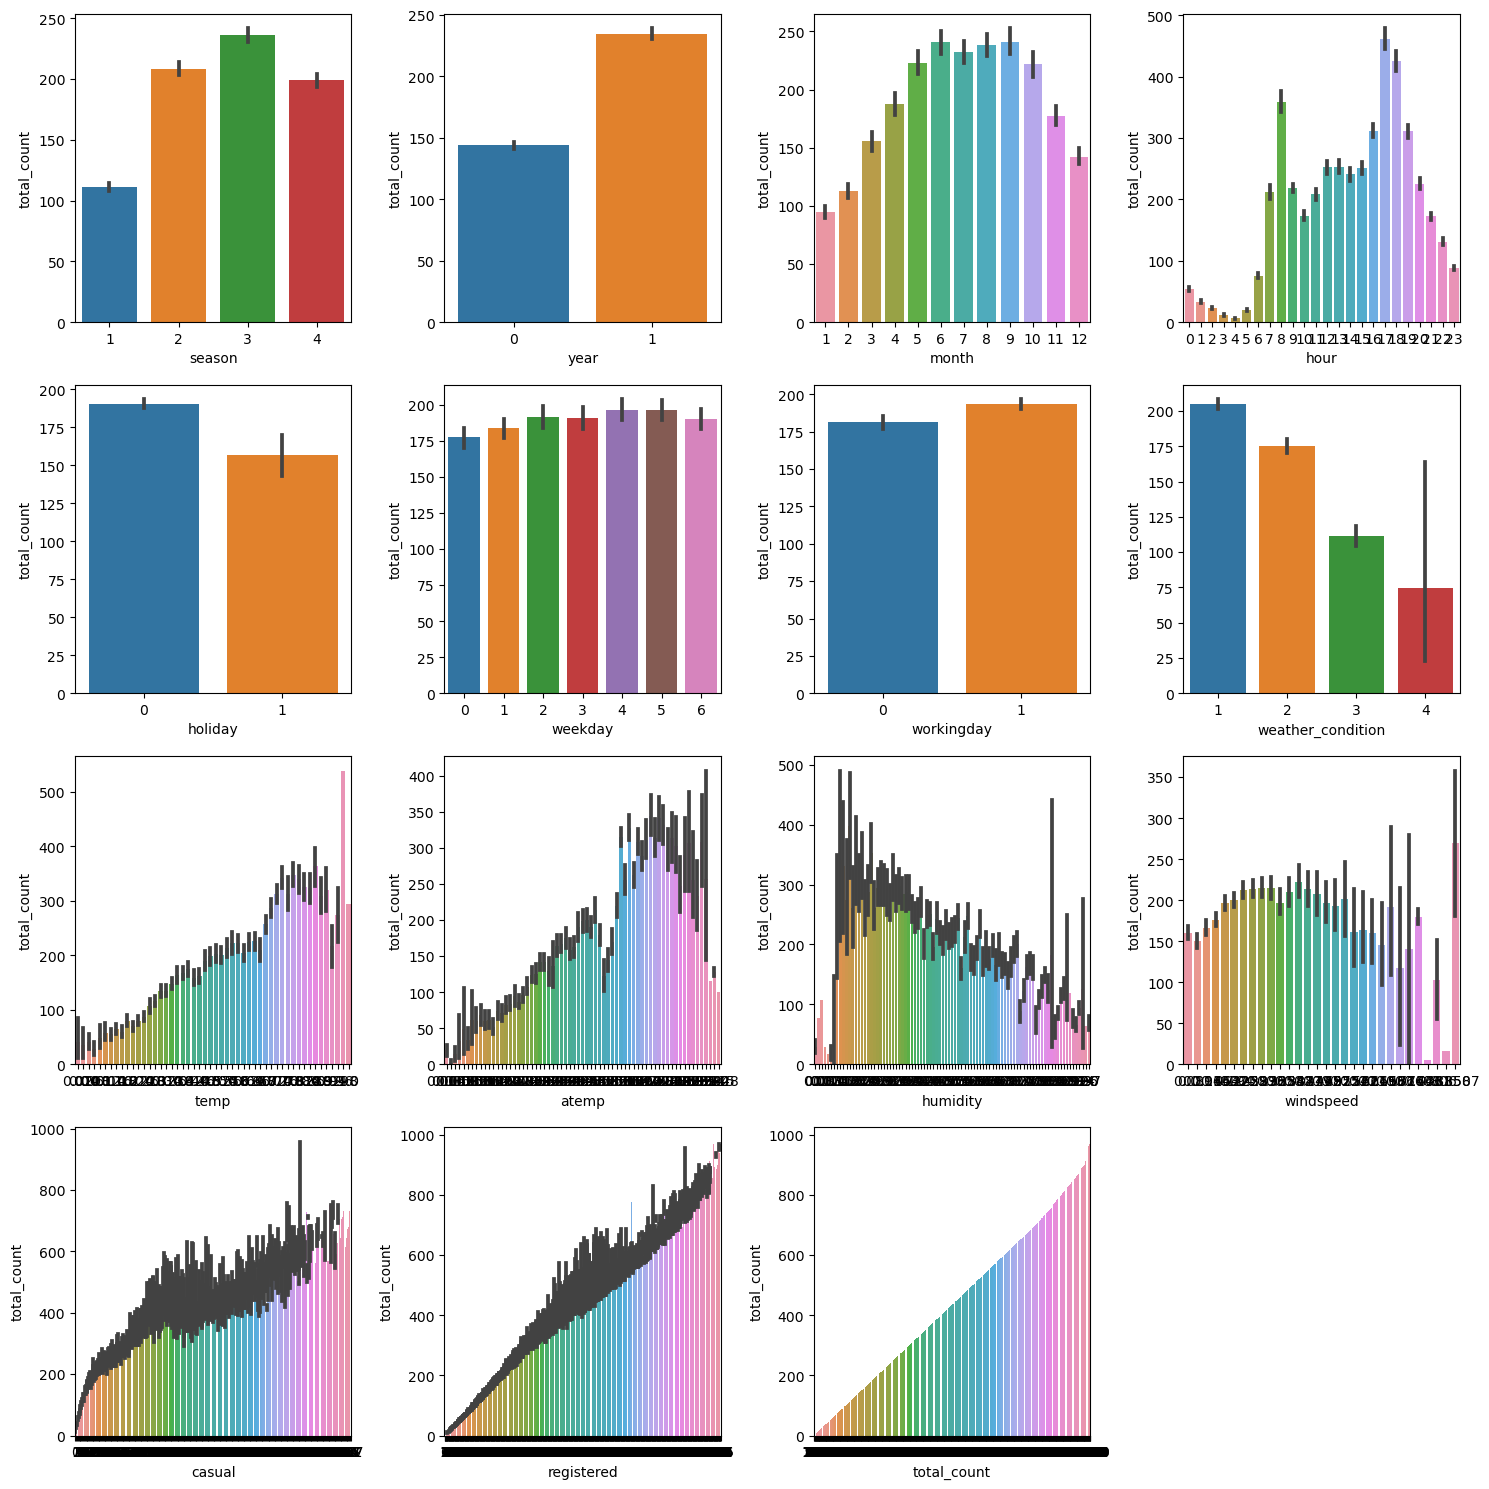

In [22]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in Bike_dh:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.barplot(x=Bike_dh[column],y=Bike_dh['total_count'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('total_count')
    plotnumber+=1
plt.tight_layout()


##### Insight

* There is high count in the number of bikes during the season 3(summer) and 2 (spring)
* There is a positive linaer relationship with count of bikes for year and workdays
* From month 5 to 10 more number of bikes used,It seems to be summer and spring season
* most of the people used bikes from 7am to 9am and 4pm to 7pm,since morning and evening
* For holiday,graph showing negative relation.mostly people not using bikes during holidays
* mostly clear or mist waethersit  people used more bikes
* For temprature almost bikes count are similiar,only slight changes
* As humidity,wind speed increases the use of bikes gets decreased


<Axes: xlabel='weekday', ylabel='total_count'>

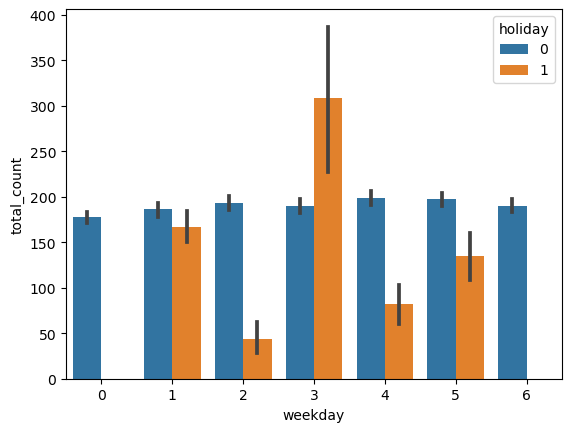

In [23]:
sns.barplot(data=Bike_dh,x=Bike_dh.weekday,y='total_count',hue='holiday')

* This graph showing weekday consist of 7 days,here holiday represent special holidays apart from weekend.The bike count of holidayis less compared with working day

<Axes: xlabel='weekday', ylabel='total_count'>

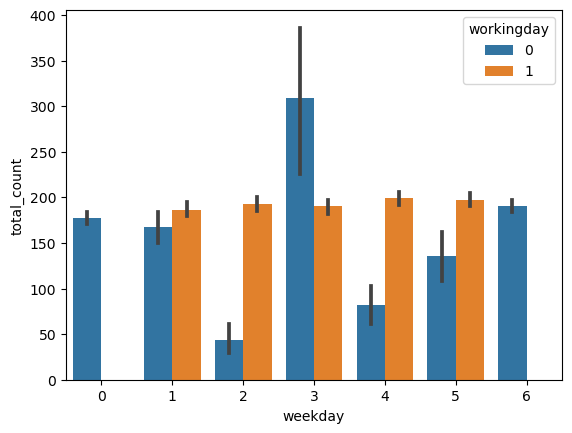

In [24]:
sns.barplot(data=Bike_dh,x=Bike_dh.weekday,y='total_count',hue='workingday')

* This graph showing almost all same bike count in working days.

<Axes: xlabel='workingday', ylabel='total_count'>

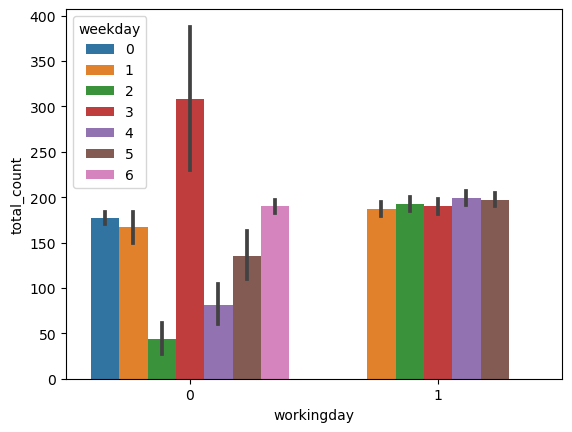

In [25]:
sns.barplot(data=Bike_dh,x=Bike_dh.workingday,y='total_count',hue='weekday')

* we can considay workingday feature,sice holiday and working day present in workingday

<Axes: xlabel='workingday', ylabel='total_count'>

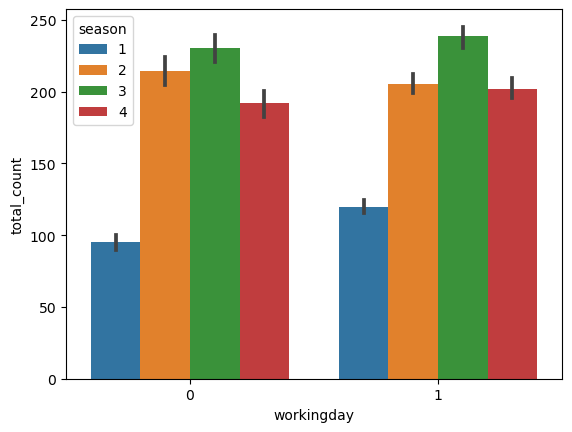

In [26]:
sns.barplot(data=Bike_dh,x=Bike_dh.workingday,y='total_count',hue='season')

##### Multivariate

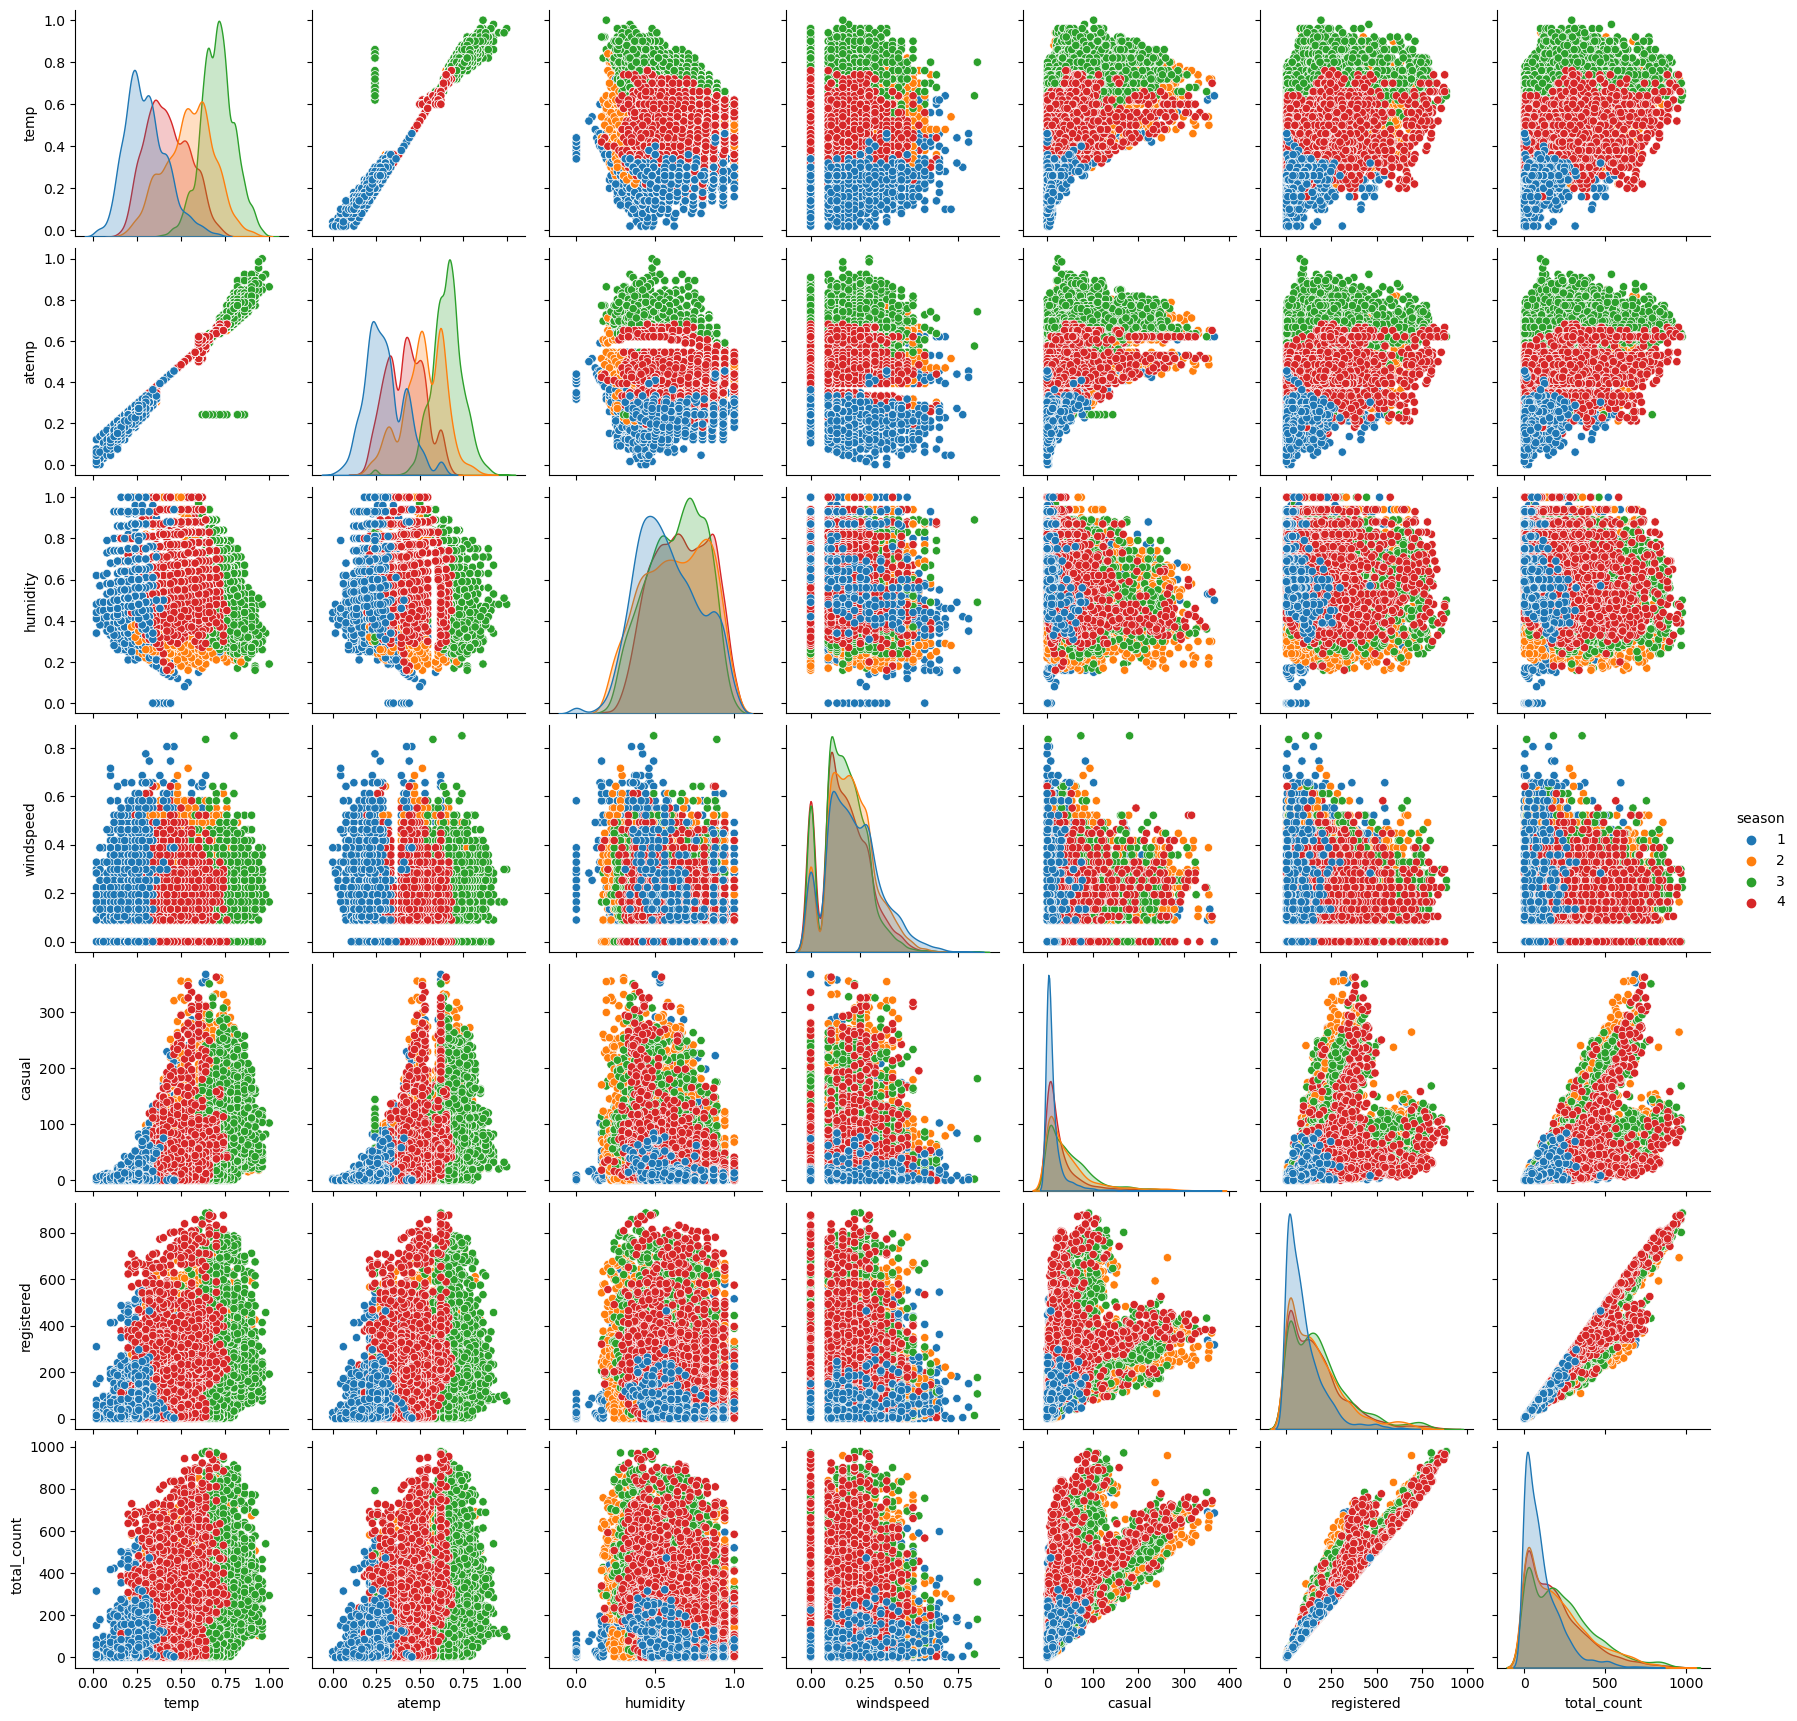

In [27]:
sns.pairplot(Bike_dh,hue='season')

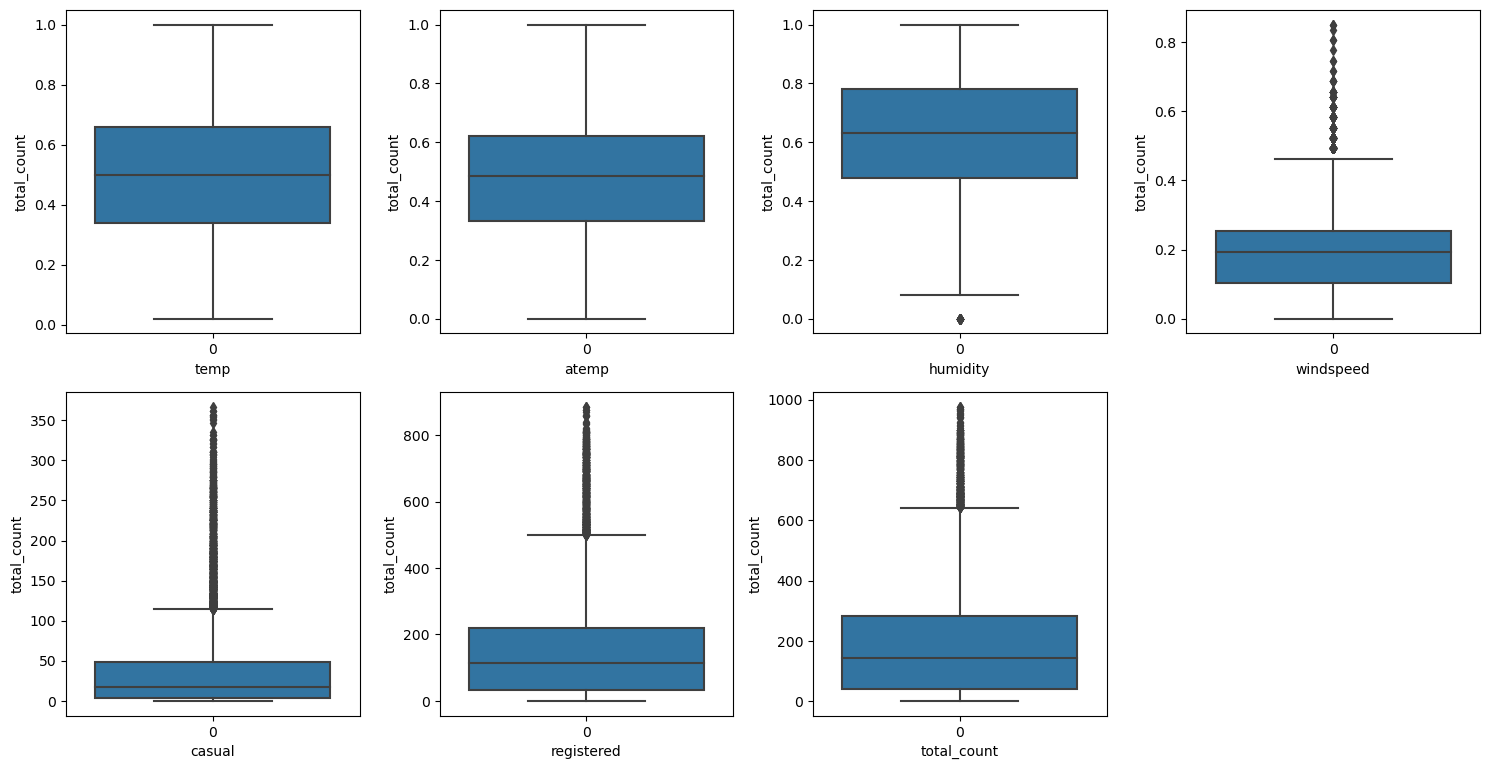

In [28]:
#checking outliers

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data=num_col[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('total_count')
    plotnumber+=1
plt.tight_layout()


outlier in the total_count is not handling,we can transform.

In [29]:
## outlier handling of humidity
Q1=Bike_dh['humidity'].quantile(0.25)
Q3=Bike_dh['humidity'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Bike_dh.loc[Bike_dh['humidity']>upper_limit,'humidity']=np.median(Bike_dh['humidity'])
Bike_dh.loc[Bike_dh['humidity']<lower_limit,'humidity']=np.median(Bike_dh['humidity'])


In [30]:
#handling outlier for windspeed
Q1=Bike_dh['windspeed'].quantile(0.25)
Q3=Bike_dh['windspeed'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Bike_dh.loc[Bike_dh['windspeed']>upper_limit,'windspeed']=np.median(Bike_dh['windspeed'])
Bike_dh.loc[Bike_dh['windspeed']<lower_limit,'windspeed']=np.median(Bike_dh['windspeed'])


In [31]:
#handling outlier for casual
Q1=Bike_dh['casual'].quantile(0.25)
Q3=Bike_dh['casual'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Bike_dh.loc[Bike_dh['casual']>upper_limit,'casual']=np.median(Bike_dh['casual'])
Bike_dh.loc[Bike_dh['casual']<lower_limit,'casual']=np.median(Bike_dh['casual'])


In [32]:
#handling outlier for registered
Q1=Bike_dh['registered'].quantile(0.25)
Q3=Bike_dh['registered'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Bike_dh.loc[Bike_dh['registered']>upper_limit,'registered']=np.median(Bike_dh['registered'])
Bike_dh.loc[Bike_dh['registered']<lower_limit,'registered']=np.median(Bike_dh['registered'])


### Feature Engineering

<Axes: >

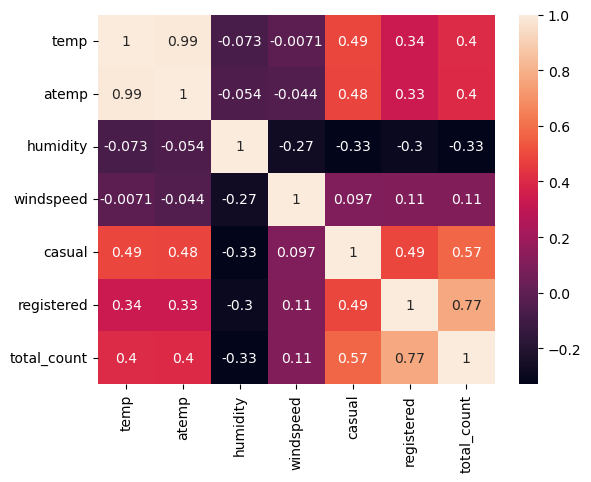

In [33]:
sns.heatmap(Bike_dh.corr(),annot=True)

* we can remove humidity due to  less co-rrelation with target variable

<Axes: >

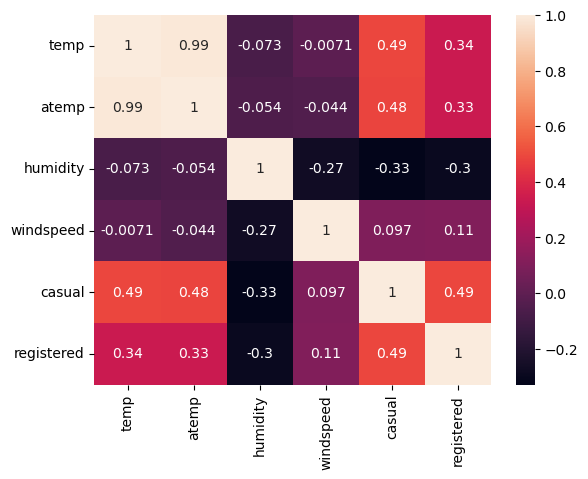

In [34]:
sns.heatmap(Bike_dh.drop('total_count',axis=1).corr(),annot=True)

* temp and atemp have same correlation,we can remove atemp
* we can remove either of casual or registered,we remove registerd

In [35]:
num_col.drop(['atemp','humidity','registered'],axis=1,inplace=True)


<Axes: xlabel='total_count', ylabel='Count'>

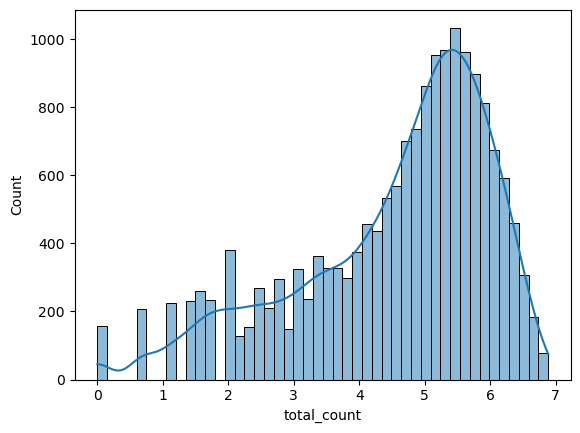

In [36]:
sns.histplot(np.log(Bike_dh['total_count']),kde=True)

### Feature Selection

In [37]:
#droping month,holiday,weekday,since not important feature
cat_col.drop(['month','holiday','weekday'],axis=1,inplace=True)


In [38]:
Bike_dh.head()

,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


In [39]:
pd.DataFrame(num_col)

,temp,windspeed,casual,total_count
0,0.24,0.0000,3,16.0
1,0.22,0.0000,8,40.0
2,0.22,0.0000,5,32.0
3,0.24,0.0000,3,13.0
4,0.24,0.0000,0,1.0
...,...,...,...,...
17374,0.26,0.1642,11,119.0
17375,0.26,0.1642,8,89.0
17376,0.26,0.1642,7,90.0
17377,0.26,0.1343,13,61.0


In [40]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
num_col_scale=scaling.fit_transform(num_col.drop('total_count',axis=1))

In [41]:
num_scaled=pd.DataFrame(num_col,columns=('temp', 'windspeed','casual'))


In [42]:
num_scaled

,temp,windspeed,casual
0,0.24,0.0000,3
1,0.22,0.0000,8
2,0.22,0.0000,5
3,0.24,0.0000,3
4,0.24,0.0000,0
...,...,...,...
17374,0.26,0.1642,11
17375,0.26,0.1642,8
17376,0.26,0.1642,7
17377,0.26,0.1343,13


In [43]:
#Encoding catgorical column
cat_enco= pd.get_dummies(cat_col)

cat_enco.head()

,season_1,season_2,season_3,season_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_20,hour_21,hour_22,hour_23,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [44]:
target=np.log(Bike_dh['total_count'])#Log Transformation
target

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: total_count, Length: 17377, dtype: float32

In [45]:
data=pd.concat([num_scaled,cat_enco,target],axis=1)
data

,temp,windspeed,casual,season_1,season_2,season_3,season_4,hour_0,hour_1,hour_2,...,hour_21,hour_22,hour_23,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,total_count
0,0.24,0.0000,3,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,2.772589
1,0.22,0.0000,8,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,3.688879
2,0.22,0.0000,5,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3.465736
3,0.24,0.0000,3,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2.564949
4,0.24,0.0000,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.1642,11,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4.779123
17375,0.26,0.1642,8,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4.488636
17376,0.26,0.1642,7,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,4.499810
17377,0.26,0.1343,13,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,4.110874


### Data Split

In [46]:
# Independent and dependent variable creation
X=data.drop('total_count',axis=1)
y=data.total_count

In [47]:
# Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

### Model creation

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
from sklearn.model_selection import RandomizedSearchCV 
from xgboost import XGBRegressor 
import warnings

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(), 
   
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n') 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.6334
- Mean Squared Error: 0.4011
- Mean Absolute Error: 0.4668
- R2 Score: 0.8176
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6528
- Mean Squared Error: 0.6528
- Mean Absolute Error: 0.4743
- R2 Score: 0.8087


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3767
- Mean Squared Error: 0.1419
- Mean Absolute Error: 0.2724
- R2 Score: 0.9355
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4685
- Mean Squared Error: 0.4685
- Mean Absolute Error: 0.3439
- R2 Score: 0.9015


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0426
- Mean Squared Error: 0.0018
- Mean Absolute Error: 0.0042
- R2 Score: 0.9992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5082
- Mean Squared Error: 0.5082
- Mean Absolute 

### HyperparameterTuning

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'max_depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [30, 50, 100,150],'learning_rate':[0.1,.01,.05,.001]},
   
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)
# Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train) 
# Make predictions
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test) 
# Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
    print(model_name) 
    model_list.append(model_name) 
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n')


Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 0.6334
- Mean Squared Error: 0.4011
- Mean Absolute Error: 0.4668
- R2 Score: 0.8176
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6528
- Mean Squared Error: 0.6528
- Mean Absolute Error: 0.4743
- R2 Score: 0.8087


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 5}
Model performance for Training set
- Root Mean Squared Error: 0.3767
- Mean Squared Error: 0.1419
- Mean Absolute Error: 0.2724
- R2 Score: 0.9355
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4685
- Mean Squared Error: 0.4685
- Mean Absolute Error: 0.3439
- R2 Score: 0.9015


Decision Tree
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 7}
Model performance for Training set
- Root Mean Squared Error: 0.5148
- Mean Squared Error: 0.2650
- Mean Absolute Error: 0.3735
- R2 Score: 0.8795
----------

<Axes: xlabel='total_count'>

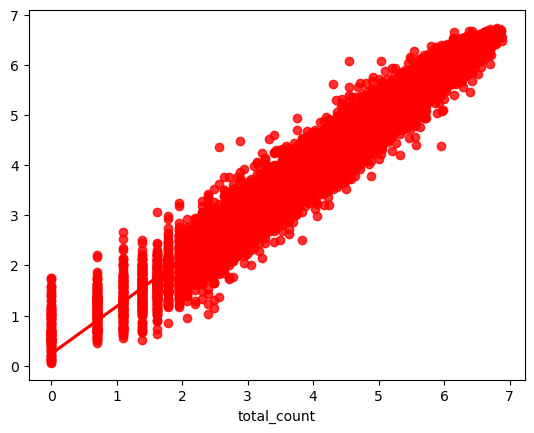

In [53]:
sns.regplot(x=y_train,y=y_train_pred,ci=None,color ='red')

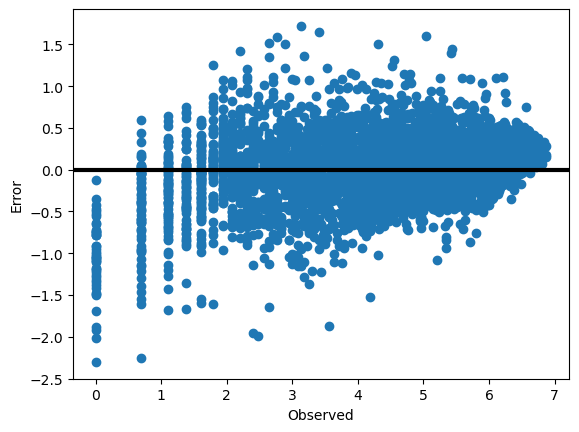

In [54]:
# plot the error difference
error = y_test - y_test_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

### Model comparison Report

When we compare R2 score,
    * Linear Regressor: 0.80
    * KNN Regressor:0.90
    * Decision Tree Regressor:0.86
    * Random Forest Regressor:0.87
    * Gradeient Boosting :0.93
    * XGB Regressor : 0.93

Its clear that,Out  of 6 models Gradient Boosting and XG boost Regressor performing well.

### Conclusion

R2 score of  Gradient Boosting,train data is 0.94,test data is 0.93 and XGB Regressor, train data is 0.95,test data is 0.93.These scores suggest that the model captures a significant portion of the variance in the target variable. The training score is very high, indicating that the model fits well to the training data. The testing score is also impressive, demonstrating that the model generalizes effectively to unseen data.

### Report on Challanges faced

* Identifying object for typecasting
* Outlier handling of dependent variable
* Model combining and hyperparameter tuning